In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.metrics import log_loss

In [2]:
train_df = pd.read_csv('../data/TCGA-SKCM_train_unresampled.csv',index_col=0)
train_df.head()

,tumor_stage,A1BG,A2M,NAT1,NAT2,RP11-986E7.7,AADAC,AAMP,AANAT,AARS,...,WASH2P.8,FRG2C,ZNF605,RP11-55K22.5,RASAL2-AS1,LINC00882,FTX,TICAM2.2,TICAM2.3,SLC25A5-AS1
submitter_id,,,,,,,,,,,,,,,,,,,,,
TCGA-3N-A9WC,0,195.1822,169236.6356,23.2862,0.0000,1601.5256,0.0000,2145.9400,0.4015,4634.7486,...,414.9353,0.4015,519.1207,0.0000,6.4238,12.4461,30.5129,85.1912,546.2250,17.2639
TCGA-BF-A1PU,0,176.3994,6716.4513,6.4935,0.0000,1692.8571,0.0000,4015.5844,1.6234,8459.7403,...,353.9578,0.0000,109.0909,0.0000,18.9123,1.6234,8.7662,115.9838,27.8831,74.0260
TCGA-BF-A1PV,0,216.8470,1740.5828,93.5445,0.0000,369.0974,0.0000,2212.7914,0.2989,4835.0269,...,361.3449,0.0000,637.4776,0.0000,12.5493,0.0000,9.8625,0.0000,201.6677,8.9659
TCGA-BF-A1PX,1,285.0608,32098.0014,42.7529,0.3476,7407.3688,5.9089,3306.2218,0.3476,3063.2603,...,425.7212,0.6952,277.0247,0.6952,11.8179,0.6952,9.0372,122.0021,0.0000,14.2510
TCGA-BF-A1PZ,0,424.5848,3218.6418,84.3327,0.0000,1302.5743,0.3056,3822.1679,1.2222,5056.6038,...,485.7047,0.0000,238.0261,0.6111,42.7591,1.8333,6.1111,68.0131,76.2661,17.4165


In [3]:
test_df = pd.read_csv('../data/TCGA-SKCM_test_unresampled.csv',index_col=0)
test_df.head()

,tumor_stage,A1BG,A2M,NAT1,NAT2,RP11-986E7.7,AADAC,AAMP,AANAT,AARS,...,WASH2P.8,FRG2C,ZNF605,RP11-55K22.5,RASAL2-AS1,LINC00882,FTX,TICAM2.2,TICAM2.3,SLC25A5-AS1
submitter_id,,,,,,,,,,,,,,,,,,,,,
TCGA-W3-AA1R,0,339.7970,31002.2717,24.5683,0.0000,255.6525,0.0000,3694.4988,1.0682,3083.1405,...,706.6299,0.7121,227.8797,0.0000,69.5175,4.9849,25.2804,87.4381,323.4965,25.9925
TCGA-D3-A3C1,0,279.4355,97508.4153,71.3710,0.0000,56133.0645,0.0000,4754.0323,0.0000,4836.2903,...,389.9919,0.4032,83.4677,0.0000,35.2984,2.0161,1.6129,20.7944,32.8952,16.1290
TCGA-W3-AA1V,0,206.0465,5039.7412,69.0173,0.3751,0.7502,0.0000,2689.7974,1.1253,11352.9632,...,336.7254,0.0000,224.6812,0.3751,25.4276,0.3751,14.6287,201.1815,67.1343,18.3796
TCGA-EB-A85J,0,290.0669,12977.0523,19.7299,0.0000,82.2079,1.4093,3839.3423,2.3488,1947.6218,...,546.9501,0.0000,287.9624,0.0000,46.3371,0.9395,7.5161,92.5802,14.4968,14.5625
TCGA-W3-A828,0,147.2238,81828.8905,109.9806,6.2984,420.5426,59.5930,2013.5659,0.4845,5335.2713,...,318.8760,0.4845,468.9922,0.0000,11.1434,10.1744,22.2868,125.2665,75.9738,15.9884


In [4]:
gene_df_train = train_df.drop([
       'tumor_stage'
],1)
gene_df_train.head()

,A1BG,A2M,NAT1,NAT2,RP11-986E7.7,AADAC,AAMP,AANAT,AARS,ABAT,...,WASH2P.8,FRG2C,ZNF605,RP11-55K22.5,RASAL2-AS1,LINC00882,FTX,TICAM2.2,TICAM2.3,SLC25A5-AS1
submitter_id,,,,,,,,,,,,,,,,,,,,,
TCGA-3N-A9WC,195.1822,169236.6356,23.2862,0.0000,1601.5256,0.0000,2145.9400,0.4015,4634.7486,135.3006,...,414.9353,0.4015,519.1207,0.0000,6.4238,12.4461,30.5129,85.1912,546.2250,17.2639
TCGA-BF-A1PU,176.3994,6716.4513,6.4935,0.0000,1692.8571,0.0000,4015.5844,1.6234,8459.7403,12.0130,...,353.9578,0.0000,109.0909,0.0000,18.9123,1.6234,8.7662,115.9838,27.8831,74.0260
TCGA-BF-A1PV,216.8470,1740.5828,93.5445,0.0000,369.0974,0.0000,2212.7914,0.2989,4835.0269,40.6455,...,361.3449,0.0000,637.4776,0.0000,12.5493,0.0000,9.8625,0.0000,201.6677,8.9659
TCGA-BF-A1PX,285.0608,32098.0014,42.7529,0.3476,7407.3688,5.9089,3306.2218,0.3476,3063.2603,80.9871,...,425.7212,0.6952,277.0247,0.6952,11.8179,0.6952,9.0372,122.0021,0.0000,14.2510
TCGA-BF-A1PZ,424.5848,3218.6418,84.3327,0.0000,1302.5743,0.3056,3822.1679,1.2222,5056.6038,90.1383,...,485.7047,0.0000,238.0261,0.6111,42.7591,1.8333,6.1111,68.0131,76.2661,17.4165


In [5]:
gene_df_test = test_df.drop([
       'tumor_stage'
],1)
gene_df_test.head()

,A1BG,A2M,NAT1,NAT2,RP11-986E7.7,AADAC,AAMP,AANAT,AARS,ABAT,...,WASH2P.8,FRG2C,ZNF605,RP11-55K22.5,RASAL2-AS1,LINC00882,FTX,TICAM2.2,TICAM2.3,SLC25A5-AS1
submitter_id,,,,,,,,,,,,,,,,,,,,,
TCGA-W3-AA1R,339.7970,31002.2717,24.5683,0.0000,255.6525,0.0000,3694.4988,1.0682,3083.1405,18.8713,...,706.6299,0.7121,227.8797,0.0000,69.5175,4.9849,25.2804,87.4381,323.4965,25.9925
TCGA-D3-A3C1,279.4355,97508.4153,71.3710,0.0000,56133.0645,0.0000,4754.0323,0.0000,4836.2903,709.6774,...,389.9919,0.4032,83.4677,0.0000,35.2984,2.0161,1.6129,20.7944,32.8952,16.1290
TCGA-W3-AA1V,206.0465,5039.7412,69.0173,0.3751,0.7502,0.0000,2689.7974,1.1253,11352.9632,68.2671,...,336.7254,0.0000,224.6812,0.3751,25.4276,0.3751,14.6287,201.1815,67.1343,18.3796
TCGA-EB-A85J,290.0669,12977.0523,19.7299,0.0000,82.2079,1.4093,3839.3423,2.3488,1947.6218,79.3893,...,546.9501,0.0000,287.9624,0.0000,46.3371,0.9395,7.5161,92.5802,14.4968,14.5625
TCGA-W3-A828,147.2238,81828.8905,109.9806,6.2984,420.5426,59.5930,2013.5659,0.4845,5335.2713,257.2674,...,318.8760,0.4845,468.9922,0.0000,11.1434,10.1744,22.2868,125.2665,75.9738,15.9884


In [6]:
gene_df_train_target = train_df[['tumor_stage']]
gene_df_train_target.astype(float, 64)
gene_df_train_target.head()

,tumor_stage
submitter_id,
TCGA-3N-A9WC,0
TCGA-BF-A1PU,0
TCGA-BF-A1PV,0
TCGA-BF-A1PX,1
TCGA-BF-A1PZ,0


In [7]:
gene_df_test_target = test_df[['tumor_stage']]
gene_df_test_target.astype(float, 64)
gene_df_test_target.head()

,tumor_stage
submitter_id,
TCGA-W3-AA1R,0
TCGA-D3-A3C1,0
TCGA-W3-AA1V,0
TCGA-EB-A85J,0
TCGA-W3-A828,0


## Classification between Primary Tumor and Metastatic (without PCA)

### Logistic Regression

In [8]:
pipe = Pipeline([
  ('scaler', StandardScaler()),
  ('logistic', LogisticRegression(
                  solver='liblinear', 
                  max_iter=10000, 
                  tol=0.001, 
                  fit_intercept=True))
])

parameters = {
    'logistic__C': [1e-03, 1e-2, 1e-1, 1, 10, 100],
    'logistic__penalty': ['l1', 'l2']
}

grid_search_feature_lr = GridSearchCV(pipe, parameters, n_jobs=4, cv=2, return_train_score=False, verbose=3, scoring='accuracy')
grid_search_feature_lr.fit(gene_df_train, gene_df_train_target.tumor_stage.astype('int'))

print("Best parameter (CV score=%0.3f):" % grid_search_feature_lr.best_score_)
print(grid_search_feature_lr.best_params_)

Fitting 2 folds for each of 12 candidates, totalling 24 fits
Best parameter (CV score=0.631):
{'logistic__C': 0.001, 'logistic__penalty': 'l2'}


LogisticRegression accuracy: 0.573


[Text(0, 0.5, 'Primary Tumor'), Text(0, 1.5, 'Metastatic')]

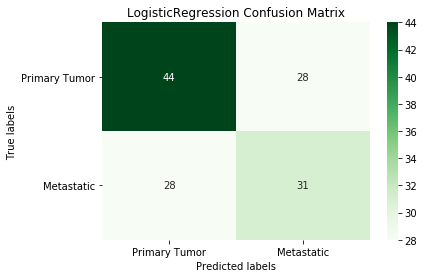

In [9]:
lr_model = grid_search_feature_lr.best_estimator_

lr_pred = grid_search_feature_lr.predict(gene_df_test)

print('LogisticRegression accuracy:', round(accuracy_score(gene_df_test_target.tumor_stage.astype('int'), lr_pred), 3))

cm_rf = confusion_matrix(gene_df_test_target.tumor_stage.astype('int'), lr_pred)

ax = plt.subplot()
sns.heatmap(cm_rf, annot=True, ax = ax, fmt='g', cmap='Greens') 
labels = ['Primary Tumor', 'Metastatic']
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('LogisticRegression Confusion Matrix') 
ax.xaxis.set_ticklabels(labels) 
ax.yaxis.set_ticklabels(labels, rotation=360)

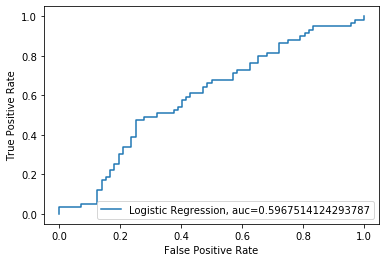

In [10]:
lr_model = grid_search_feature_lr.best_estimator_
lr_pred_proba = lr_model.predict_proba(gene_df_test)[::,1]
fpr, tpr, _ = roc_curve(gene_df_test_target.tumor_stage.astype('int'),  lr_pred_proba)
auc = roc_auc_score(gene_df_test_target.tumor_stage.astype('int'), lr_pred_proba)
plt.plot(fpr,tpr,label="Logistic Regression, auc="+str(auc))
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend(loc=4)
plt.show()

In [11]:
lr_model = grid_search_feature_lr.best_estimator_
lr_pred_proba = lr_model.predict_proba(gene_df_test)[::,1]
log_loss_score = log_loss(gene_df_test_target.tumor_stage.astype('int'),  lr_pred_proba)
print(log_loss_score)

1.0325485742205955


### Support Vector Machines

In [12]:
pipe = Pipeline([
  ('scaler', StandardScaler()),
  ('SVM', SVC(probability=True))
])

parameters = {
    'SVM__C': [0.001, 0.01, 0.1, 1, 10, 100], 
    'SVM__gamma': [1, 0.1, 0.01, 0.001, 0.00001, 10], 
    "SVM__kernel": ["linear","poly","sigmoid","rbf"], 
    "SVM__decision_function_shape" : ["ovo", "ovr"]
}

grid_search_feature_svm = GridSearchCV(pipe, parameters, n_jobs=4, cv=2, return_train_score=False, verbose=3, scoring='accuracy')
grid_search_feature_svm.fit(gene_df_train, gene_df_train_target.tumor_stage.astype('int'))

print("Best parameter (CV score=%0.3f):" % grid_search_feature_svm.best_score_)
print(grid_search_feature_svm.best_params_)

Fitting 2 folds for each of 288 candidates, totalling 576 fits
Best parameter (CV score=0.615):
{'SVM__C': 10, 'SVM__decision_function_shape': 'ovo', 'SVM__gamma': 1e-05, 'SVM__kernel': 'sigmoid'}


Support Vector Machines accuracy: 0.595


[Text(0, 0.5, 'Primary Tumor'), Text(0, 1.5, 'Metastatic')]

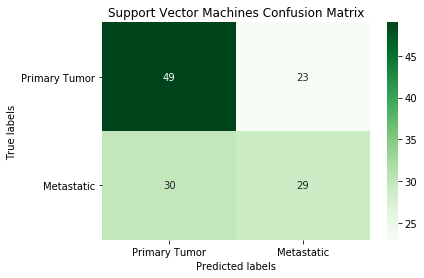

In [13]:
svm_model = grid_search_feature_svm.best_estimator_

svm_pred = grid_search_feature_svm.predict(gene_df_test)

print('Support Vector Machines accuracy:', round(accuracy_score(gene_df_test_target.tumor_stage.astype('int'), svm_pred), 3))

cm_rf = confusion_matrix(gene_df_test_target.tumor_stage.astype('int'), svm_pred)

ax = plt.subplot()
sns.heatmap(cm_rf, annot=True, ax = ax, fmt='g', cmap='Greens') 
labels = ['Primary Tumor', 'Metastatic']
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Support Vector Machines Confusion Matrix') 
ax.xaxis.set_ticklabels(labels) 
ax.yaxis.set_ticklabels(labels, rotation=360)

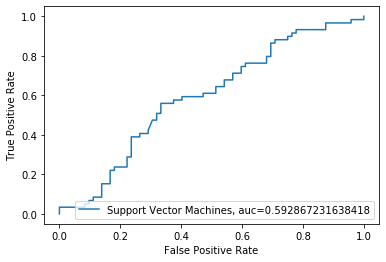

In [14]:
svm_model = grid_search_feature_svm.best_estimator_
svm_pred_proba = svm_model.predict_proba(gene_df_test)[::,1]
fpr, tpr, _ = roc_curve(gene_df_test_target.tumor_stage.astype('int'),  svm_pred_proba)
auc = roc_auc_score(gene_df_test_target.tumor_stage.astype('int'), svm_pred_proba)
plt.plot(fpr,tpr,label="Support Vector Machines, auc="+str(auc))
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend(loc=4)
plt.show()

In [15]:
svm_model = grid_search_feature_svm.best_estimator_
svm_pred_proba = svm_model.predict_proba(gene_df_test)[::,1]
log_loss_score = log_loss(gene_df_test_target.tumor_stage.astype('int'),  svm_pred_proba)
print(log_loss_score)

0.7931643529875213


### Random Forest 

In [ ]:
pipe = Pipeline([
  ('scaler', StandardScaler()),
  ('rf', RandomForestClassifier(random_state=1))
])

parameters = {
    'rf__bootstrap': [True], 
    'rf__n_estimators': [30, 60, 70, 80, 90], 
    'rf__max_features': [0.6, 0.65, 0.7, 0.75, 0.8], 
    "rf__min_samples_leaf":  [6, 8, 10, 12, 14], 
    "rf__min_samples_split" : [2, 3, 5, 7]    
}

grid_search_feature_rf = GridSearchCV(pipe, parameters, n_jobs=4, cv=2, return_train_score=False, verbose=3, scoring='accuracy')
grid_search_feature_rf.fit(gene_df_train, gene_df_train_target.tumor_stage.astype('int'))

print("Best parameter (CV score=%0.3f):" % grid_search_feature_rf.best_score_)
print(grid_search_feature_rf.best_params_)

Fitting 2 folds for each of 500 candidates, totalling 1000 fits


In [ ]:
rf_model = grid_search_feature_rf.best_estimator_

rf_pred = grid_search_feature_rf.predict(gene_df_test)

print('Random Forest accuracy:', round(accuracy_score(gene_df_test_target.tumor_stage.astype('int'), rf_pred), 3))

cm_rf = confusion_matrix(gene_df_test_target.tumor_stage.astype('int'), rf_pred)

ax = plt.subplot()
sns.heatmap(cm_rf, annot=True, ax = ax, fmt='g', cmap='Greens') 
labels = ['Primary Tumor', 'Metastatic']
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Random Forest Confusion Matrix') 
ax.xaxis.set_ticklabels(labels) 
ax.yaxis.set_ticklabels(labels, rotation=360)

In [ ]:
rf_model = grid_search_feature_rf.best_estimator_
rf_pred_proba = rf_model.predict_proba(gene_df_test)[::,1]
fpr, tpr, _ = roc_curve(gene_df_test_target.tumor_stage.astype('int'),  rf_pred_proba)
auc = roc_auc_score(gene_df_test_target.tumor_stage.astype('int'), rf_pred_proba)
plt.plot(fpr,tpr,label="Random Forest, auc="+str(auc))
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend(loc=4)
plt.show()

In [ ]:
rf_model = grid_search_feature_rf.best_estimator_
rf_pred_proba = rf_model.predict_proba(gene_df_test)[::,1]
log_loss_score = log_loss(gene_df_test_target.tumor_stage.astype('int'),  rf_pred_proba)
print(log_loss_score)

## Classification between Primary Tumor and Metastatic (with PCA)

### Using Logistic Regression

In [ ]:
pipe = Pipeline([
  ('scaler', StandardScaler()),
  ('pca', PCA(svd_solver='full')),
  ('logistic', LogisticRegression(
                  solver='liblinear', 
                  max_iter=10000, 
                  tol=0.001, 
                  fit_intercept=True))
])

parameters = {
    'pca__n_components': [0.6, 0.7, 0.75, 0.8, 0.9],    
    'logistic__C': [1e-03, 1e-2, 1e-1, 1, 10, 100],
    'logistic__penalty': ['l1', 'l2']
}

grid_search_lr_pca = GridSearchCV(pipe, parameters, n_jobs=4, cv=2, return_train_score=False, verbose=3, scoring='accuracy')
grid_search_lr_pca.fit(gene_df_train, gene_df_train_target.tumor_stage.astype('int'))

print("Best parameter (CV score=%0.3f):" % grid_search_lr_pca.best_score_)
print(grid_search_lr_pca.best_params_)

In [ ]:
grid_search_lr_pca.best_estimator_

In [ ]:
lr_model_pca = grid_search_lr_pca.best_estimator_

lr_pred = grid_search_lr_pca.predict(gene_df_test)

print('LogisticRegression accuracy:', round(accuracy_score(gene_df_test_target.tumor_stage.astype('int'), lr_pred), 3))

cm_rf = confusion_matrix(gene_df_test_target.tumor_stage.astype('int'), lr_pred)

ax = plt.subplot()
sns.heatmap(cm_rf, annot=True, ax = ax, fmt='g', cmap='Greens') 
labels = ['Primary Tumor', 'Metastatic']
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('LogisticRegression Confusion Matrix') 
ax.xaxis.set_ticklabels(labels) 
ax.yaxis.set_ticklabels(labels, rotation=360)

In [ ]:
lr_model = grid_search_lr_pca.best_estimator_
lr_pred_proba = lr_model.predict_proba(gene_df_test)[::,1]
fpr, tpr, _ = roc_curve(gene_df_test_target.tumor_stage.astype('int'),  lr_pred_proba)
auc = roc_auc_score(gene_df_test_target.tumor_stage.astype('int'), lr_pred_proba)
plt.plot(fpr,tpr,label="Logistic Regression, auc="+str(auc))
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend(loc=4)
plt.show()

In [ ]:
lr_model = grid_search_lr_pca.best_estimator_
lr_pred_proba = lr_model.predict_proba(gene_df_test)[::,1]
log_loss_score = log_loss(gene_df_test_target.tumor_stage.astype('int'),  lr_pred_proba)
print(log_loss_score)

### Using Support Vector Machines

In [ ]:
pipe = Pipeline([
  ('scaler', StandardScaler()),
  ('pca', PCA(svd_solver='full')),    
  ('SVM', SVC(probability=True))
])

parameters = {
    'pca__n_components': [0.6, 0.7, 0.75, 0.8, 0.9],    
    'SVM__C': [0.001, 0.01, 0.1, 1, 10, 100], 
    'SVM__gamma': [1, 0.1, 0.01, 0.001, 0.0001, 10], 
    "SVM__kernel": ["linear","poly","rbf"], 
    "SVM__decision_function_shape" : ["ovo", "ovr"]
}

grid_search_svm_pca = GridSearchCV(pipe, parameters, n_jobs=4, cv=2, return_train_score=False, verbose=3, scoring='accuracy')
grid_search_svm_pca.fit(gene_df_train, gene_df_train_target.tumor_stage.astype('int'))

print("Best parameter (CV score=%0.3f):" % grid_search_svm_pca.best_score_)
print(grid_search_svm_pca.best_params_)

In [ ]:
grid_search_svm_pca.best_estimator_

In [ ]:
svm_model = grid_search_svm_pca.best_estimator_

svm_pred = grid_search_svm_pca.predict(gene_df_test)

print('Support Vector Machines accuracy:', round(accuracy_score(gene_df_test_target.tumor_stage.astype('int'), svm_pred), 3))

cm_rf = confusion_matrix(gene_df_test_target.tumor_stage.astype('int'), svm_pred)

ax = plt.subplot()
sns.heatmap(cm_rf, annot=True, ax = ax, fmt='g', cmap='Greens') 
labels = ['Primary Tumor', 'Metastatic']
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Support Vector Machines Confusion Matrix') 
ax.xaxis.set_ticklabels(labels) 
ax.yaxis.set_ticklabels(labels, rotation=360)

In [ ]:
svm_model = grid_search_svm_pca.best_estimator_
svm_pred_proba = svm_model.predict_proba(gene_df_test)[::,1]
fpr, tpr, _ = roc_curve(gene_df_test_target.tumor_stage.astype('int'),  svm_pred_proba)
auc = roc_auc_score(gene_df_test_target.tumor_stage.astype('int'), svm_pred_proba)
plt.plot(fpr,tpr,label="Support Vector Machines, auc="+str(auc))
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend(loc=4)
plt.show()

In [ ]:
svm_model = grid_search_svm_pca.best_estimator_
svm_pred_proba = svm_model.predict_proba(gene_df_test)[::,1]
log_loss_score = log_loss(gene_df_test_target.tumor_stage.astype('int'),  svm_pred_proba)
print(log_loss_score)

### Using Random Forest

In [33]:
pipe = Pipeline([
  ('scaler', StandardScaler()),
  ('pca', PCA(svd_solver='full')),    
  ('rf', RandomForestClassifier(random_state=1))
])

parameters = {
    'pca__n_components': [0.6, 0.7, 0.75, 0.8, 0.9],    
    'rf__bootstrap': [True], 
    'rf__n_estimators': [30, 60, 70, 80, 90], 
    'rf__max_features': [0.6, 0.65, 0.7, 0.75, 0.8], 
    "rf__min_samples_leaf":  [6, 8, 10, 12, 14], 
    "rf__min_samples_split" : [2, 3, 5, 7]    
}

grid_search_rf_pca = GridSearchCV(pipe, parameters, n_jobs=4, cv=2, return_train_score=False, verbose=3, scoring='accuracy')
grid_search_rf_pca.fit(gene_df_train, gene_df_train_target.tumor_stage.astype('int'))

print("Best parameter (CV score=%0.3f):" % grid_search_rf_pca.best_score_)
print(grid_search_rf_pca.best_params_)

Fitting 2 folds for each of 2500 candidates, totalling 5000 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   37.1s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:  2.5min
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:  4.4min
[Parallel(n_jobs=4)]: Done 504 tasks      | elapsed:  9.1min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed: 13.6min
[Parallel(n_jobs=4)]: Done 1144 tasks      | elapsed: 18.0min
[Parallel(n_jobs=4)]: Done 1560 tasks      | elapsed: 24.5min
[Parallel(n_jobs=4)]: Done 2040 tasks      | elapsed: 30.7min
[Parallel(n_jobs=4)]: Done 2584 tasks      | elapsed: 37.8min
[Parallel(n_jobs=4)]: Done 3192 tasks      | elapsed: 45.1min
[Parallel(n_jobs=4)]: Done 3864 tasks      | elapsed: 53.4min
[Parallel(n_jobs=4)]: Done 4600 tasks      | elapsed: 62.5min
[Parallel(n_jobs=4)]: Done 5000 out of 5000 | elapsed: 69.2min finished


Best parameter (CV score=0.850):
{'pca__n_components': 0.6, 'rf__bootstrap': True, 'rf__max_features': 0.65, 'rf__min_samples_leaf': 10, 'rf__min_samples_split': 2, 'rf__n_estimators': 70}


In [34]:
grid_search_rf_pca.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('pca', PCA(n_components=0.6, svd_solver='full')),
                ('rf',
                 RandomForestClassifier(max_features=0.65, min_samples_leaf=10,
                                        n_estimators=70, random_state=1))])

Random Forest accuracy: 0.829


[Text(0, 0.5, 'Primary Tumor'), Text(0, 1.5, 'Metastatic')]

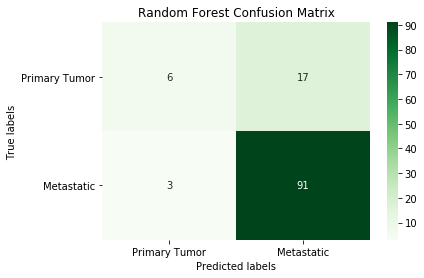

In [35]:
rf_model = grid_search_rf_pca.best_estimator_

rf_pred = grid_search_rf_pca.predict(gene_df_test)

print('Random Forest accuracy:', round(accuracy_score(gene_df_test_target.tumor_stage.astype('int'), rf_pred), 3))

cm_rf = confusion_matrix(gene_df_test_target.tumor_stage.astype('int'), rf_pred)

ax = plt.subplot()
sns.heatmap(cm_rf, annot=True, ax = ax, fmt='g', cmap='Greens') 
labels = ['Primary Tumor', 'Metastatic']
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Random Forest Confusion Matrix') 
ax.xaxis.set_ticklabels(labels) 
ax.yaxis.set_ticklabels(labels, rotation=360)

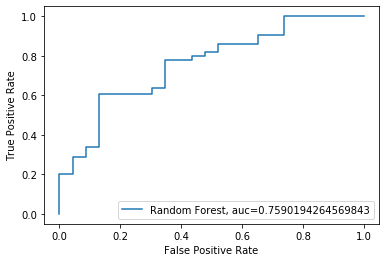

In [36]:
rf_model = grid_search_rf_pca.best_estimator_
rf_pred_proba = rf_model.predict_proba(gene_df_test)[::,1]
fpr, tpr, _ = roc_curve(gene_df_test_target.tumor_stage.astype('int'),  rf_pred_proba)
auc = roc_auc_score(gene_df_test_target.tumor_stage.astype('int'), rf_pred_proba)
plt.plot(fpr,tpr,label="Random Forest, auc="+str(auc))
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend(loc=4)
plt.show()

In [37]:
rf_model = grid_search_rf_pca.best_estimator_
rf_pred_proba = rf_model.predict_proba(gene_df_test)[::,1]
log_loss_score = log_loss(gene_df_test_target.tumor_stage.astype('int'),  rf_pred_proba)
print(log_loss_score)

0.4407973308797116


### Weights

In [39]:
lr_model = grid_search_feature_lr.best_estimator_
lr_weights_df = pd.DataFrame(lr_model[1].coef_[0])
lr_weights_df.index = gene_df_train.columns
lr_weights_df.columns = ["weights"]
lr_weights_df.sort_values(by=['weights'], inplace=True, ascending=False)
lr_weights_df.head(10)

,weights
C7,0.513050
NFATC3,0.269184
FILIP1,0.229022
MECOM,0.068254
TCEAL7,0.063319
SLC12A8,0.045164
CLIC5,0.031467
SEMA3G,0.029761
RNF152,0.023402
SLITRK4,0.020633


In [40]:
svm_model = grid_search_feature_svm.best_estimator_
importances = np.dot(svm_model[1].support_,svm_model[1].support_vectors_)
svm_weights_df = pd.DataFrame(importances)
svm_weights_df.index = gene_df_train.columns
svm_weights_df.columns = ["weights"]
svm_weights_df.sort_values(by=['weights'], inplace=True, ascending=False)
svm_weights_df.head(10)

,weights
SLC26A6,8195.606711
TRMU,7821.113288
LOC440957,7705.081859
LOC729991,7586.562719
ZMYND19,7520.668213
TMEM115,7467.850864
HMG20B,7224.516676
AGPAT2,7207.745245
PPFIA3,7182.719751
PDRG1,7120.678339


In [41]:
rf_model = grid_search_feature_rf.best_estimator_
rf_weights_df = pd.DataFrame(rf_model[1].feature_importances_)
rf_weights_df.index = gene_df_train.columns
rf_weights_df.columns = ["weights"]
rf_weights_df.sort_values(by=['weights'], inplace=True, ascending=False)
rf_weights_df.head(10)

,weights
KRT17,0.171330
C7,0.129649
KRT14,0.097657
KRT75,0.089892
KRT6B,0.075515
S100A7,0.061897
NFATC3,0.036406
SPRR4,0.024191
CNGB1,0.022737
ODZ2,0.021894


In [42]:
weights = lr_weights_df.merge(svm_weights_df,left_index=True, right_index=True)
weights = weights.merge(rf_weights_df,left_index=True, right_index=True)
weights.columns = ["Logistic Regression", "Support Vector Machines","Random Forest"]
weights.head(20)

,Logistic Regression,Support Vector Machines,Random Forest
C7,0.513050,-5837.796145,0.129649
NFATC3,0.269184,-7463.540538,0.036406
FILIP1,0.229022,-5944.163521,0.000000
MECOM,0.068254,-3202.151352,0.007108
TCEAL7,0.063319,-3779.457788,0.000000
SLC12A8,0.045164,-595.476505,0.000000
CLIC5,0.031467,-6653.087548,0.000000
SEMA3G,0.029761,-2329.323109,0.000000
RNF152,0.023402,621.870387,0.007273
SLITRK4,0.020633,-3489.878868,0.000000


In [43]:
weights.to_csv('../data/Melanoma_Genomic_classifier_weights_all_data.csv')